<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/edgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
url = 'https://thredds.met.no/thredds/dodsC/metpplatest/met_forecast_1_0km_nordic_latest.nc'
forc = xr.open_dataset(url)

In [4]:
forc


<xarray.Dataset>
Dimensions:                                                         (time: 59, x: 1796, y: 2321)
Coordinates:
  * time                                                            (time) datetime64[ns] 2021-03-09T18:00:00 ... 2021-03-12T04:00:00
  * x                                                               (x) float64 -8.974e+05 ... 8.976e+05
  * y                                                               (y) float64 -1.104e+06 ... 1.216e+06
    latitude                                                        (y, x) float64 ...
    longitude                                                       (y, x) float64 ...
Data variables:
    forecast_reference_time                                         datetime64[ns] 2021-03-09T18:00:00
    projection_lcc                                                  int32 -2147483647
    altitude                                                        (y, x) float32 ...
    land_area_fraction                                              (y, x) float32 ...
    air_temperature_2m                                              (time, y, x) float32 ...
    precipitation_amount                                            (time, y, x) float32 ...
    wind_direction_10m                                              (time, y, x) float32 ...
    wind_speed_10m                                                  (time, y, x) float32 ...
    wind_speed_of_gust                                              (time, y, x) float32 ...
    cloud_area_fraction                                             (time, y, x) float32 ...
    air_pressure_at_sea_level                                       (time, y, x) float32 ...
    integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time  (time, y, x) float32 ...
    relative_humidity_2m                                            (time, y, x) float32 ...
Attributes:
    institution:                     Norwegian Meteorological Institute, met.no
    creator_url:                     met.no
    geospatial_lat_min:              51.0
    geospatial_lat_max:              88.0
    geospatial_lon_min:              -20.0
    geospatial_lon_max:              80.0
    references:                      unknown
    license:                         http://met.no/sb5-met.no/Forskning/Infor...
    source:                          meps
    summary:                         Based on model data from MEPS (MetCoOp-E...
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    meps_forecast_reference_time:    1615302000
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [11]:
[ix,jx] = findindex(forc.latitude,forc.longitude,60.877382,10.929345) # Mjøstårnet

In [8]:
jx

677

In [7]:
import matplotlib.pyplot as plt

RuntimeError: ignored

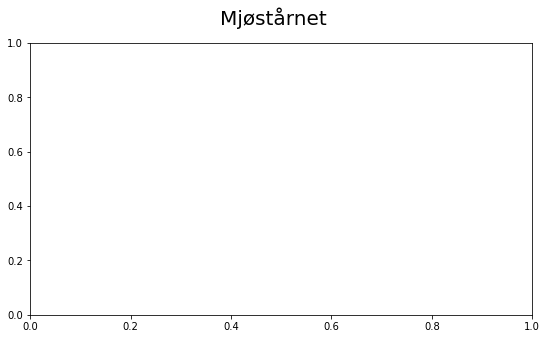

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
fig.suptitle("Mjøstårnet",size=20)
ax.plot(forc.time,forc.wind_speed_of_gust[:,ix,jx])
ax.tick_params(axis='y',labelsize=15)
ax.set_ylabel('Temperatur, [C]',size=15)

RuntimeError: ignored

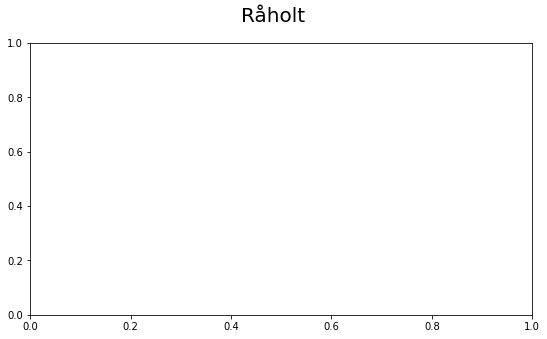

In [ ]:
#forc.air_temperature_2m
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,5))
fig.suptitle("Råholt",size=20)
ax.plot(forc.time,forc.air_temperature_2m[:,ix,jx]-273.15)
ax.tick_params(axis='y',labelsize=15)
ax.set_ylabel('Temperatur, [C]',size=15)

fig, ax = plt.subplots(figsize=(9,5))
fig.suptitle("Råholt",size=20)
ax.plot(forc.time,forc.wind_speed_10m[:,ix,jx])
ax.plot(forc.time,forc.wind_speed_of_gust[:,ix,jx])

fig, ax = plt.subplots(figsize=(9,5))
fig.suptitle("Råholt",size=20)
ax.plot(forc.time,forc.air_pressure_at_sea_level[:,ix,jx])

fig, ax = plt.subplots(figsize=(9,5))
fig.suptitle("Råholt",size=20)
ax.plot(forc.time,forc.wind_direction_10m[:,ix,jx])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'extemd'


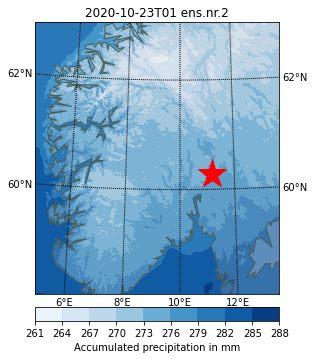

In [ ]:

from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep_1=6
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(2,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=63.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forc.longitude),np.array(forc.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forc.air_temperature_2m[timestep_1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forc.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
NYClat, NYClon = 60.274365,11.180386 #40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
m.plot(xpt, ypt, 'c*',color='r', markersize=30)
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      

## New forecast

In [ ]:
url = 'https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc'
forc = xr.open_dataset(url)

In [ ]:
forc.air_temperature_2m

<xarray.DataArray 'air_temperature_2m' (time: 62, height0: 1, ensemble_member: 30, y: 1069, x: 949)>
[1886934660 values with dtype=float32]
Coordinates:
  * time             (time) datetime64[ns] 2020-10-22T17:00:00 ... 2020-10-25T06:00:00
  * ensemble_member  (ensemble_member) int16 0 1 2 3 4 5 6 ... 24 25 26 27 28 29
  * height0          (height0) float32 2.0
  * x                (x) float32 -1060084.0 -1057584.0 ... 1307416.0 1309916.0
  * y                (y) float32 -1332517.9 -1330017.9 ... 1334982.1 1337482.1
    longitude        (y, x) float64 ...
    latitude         (y, x) float64 ...
Attributes:
    long_name:      Screen level temperature (T2M)
    standard_name:  air_temperature
    units:          K
    grid_mapping:   projection_lambert
    _ChunkSizes:    [  1   1  10 357 317]

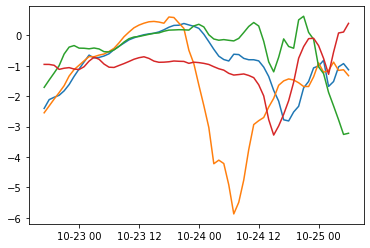

In [ ]:
forc.air_temperature_2m

plt.plot(forc.time,forc.air_temperature_2m[:,0,0,ix,jx]-273)
plt.plot(forc.time,forc.air_temperature_2m[:,0,1,ix,jx]-273)
plt.plot(forc.time,forc.air_temperature_2m[:,0,2,ix,jx]-273)
plt.plot(forc.time,forc.air_temperature_2m[:,0,3,ix,jx]-273)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'extemd'


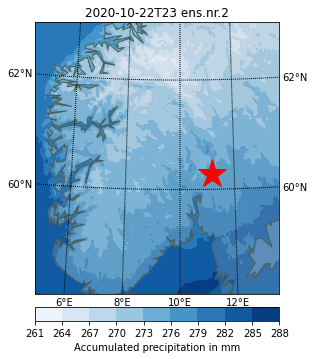

In [ ]:

from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep_1=6
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(2,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=63.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forc.longitude),np.array(forc.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forc.air_temperature_2m[timestep_1,mlevel,memb1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forc.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
NYClat, NYClon = 60.274365,11.180386 #40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
m.plot(xpt, ypt, 'c*',color='r', markersize=30)
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      